In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl
import numpy as np

In [2]:
filepath = "C:\\Users\\Dhruv\\Downloads\\CarDataSet.csv"

In [3]:
data = pd.read_csv(filepath)

In [4]:
data.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


## 1. Data Preproceesing : Finding the missing data and eliminating the undesirable columns or rows

In [6]:
missing_data = data.isna().sum().sort_values()
print(missing_data)

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
Price                1234
New_Price            6247
dtype: int64


Text(0.5, 1.0, 'Total Missing Values')

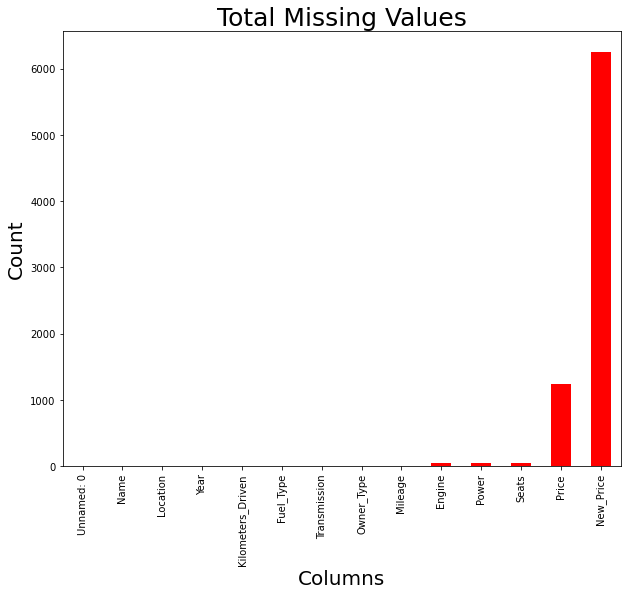

In [183]:
missing_data.plot(kind = 'bar', color='red', figsize = (10,8))

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 25)

In [7]:
# Values of new price are too low to be considered and Unnamed column is non sense
data.drop(["Unnamed: 0", "New_Price"],axis = 1, inplace= True)

In [8]:
data.dropna(subset=["Price", 'Mileage', 'Power', 'Engine', 'Seats'], inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [10]:
data.isna().sum().sort_values()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [11]:
#No missing values found
data[data['Mileage']== '0.0 kmpl']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.0,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.75
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,0.0 kmpl,1086 CC,null bhp,5.0,1.50
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0 kmpl,1968 CC,null bhp,5.0,5.45
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,3.35
544,Mercedes-Benz New C-Class Progressive C 200,Kochi,2019,13190,Petrol,Automatic,First,0.0 kmpl,1950 CC,181.43 bhp,5.0,38.99
631,Hyundai Santro LS zipPlus,Chennai,2002,70000,Petrol,Manual,Third,0.0 kmpl,1086 CC,null bhp,5.0,0.65
647,Hyundai Santro Xing XP,Jaipur,2004,200000,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,0.80


In [12]:
data[data['Power']== 'null bhp']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5861,Hyundai Santro Xing XO,Chennai,2007,79000,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,1.85
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,1.20
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5.0,2.85
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6.0,1.70


In [13]:
# Replacing vlaue of Null bhp with arbitrary 110 so that it doesn't cause problems during conversion of data types
data['Power'] = data['Power'].replace('null bhp', '110')

In [14]:
data.duplicated().sum()

0

###  Removing string values from columns and changing data type to float64

In [15]:
data['Engine'] = data['Engine'].str.replace('[^\d\.]', '').astype('float64')

C:\Users\Dhruv\AppData\Local\Temp/ipykernel_19868/698162610.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Engine'] = data['Engine'].str.replace('[^\d\.]', '').astype('float64')


In [16]:
data['Mileage'] = data['Mileage'].str.replace('[^\d\.]', '').astype('float64')

C:\Users\Dhruv\AppData\Local\Temp/ipykernel_19868/2436876058.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Mileage'] = data['Mileage'].str.replace('[^\d\.]', '').astype('float64')


In [17]:
data['Power'] = data['Power'].str.replace('[^\d\.]', '').astype('float64')

C:\Users\Dhruv\AppData\Local\Temp/ipykernel_19868/1545326824.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Power'] = data['Power'].str.replace('[^\d\.]', '').astype('float64')


In [18]:
data['Mileage'].describe()

count    5975.000000
mean       18.179408
std         4.521801
min         0.000000
25%        15.200000
50%        18.160000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

In [19]:
# Replacing null values with mean value of mileage

data['Mileage'] = data['Mileage'].replace(0.0, 18.17)

In [20]:
data['Mileage'].describe()

count    5975.000000
mean       18.349704
std         4.161691
min         6.400000
25%        15.400000
50%        18.170000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

In [21]:
print(data.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object


In [22]:
data['Name'].nunique()

1855

### Creating column "Brand"

#### So there are 1747 unique names out of almost 5500 cars. So we can just have the name Brand instead of the whole name of the car

In [23]:
data['Brand'] = data['Name'].apply(lambda row: row.split()[0])

In [24]:
 data['Brand'].unique()


array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [25]:
data.drop(['Name'], axis =1 , inplace=True)

In [26]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [27]:
data['Brand'].value_counts().sort_values(ascending= False)

Maruti           1197
Hyundai          1100
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Brand, dtype: int64

## Detecting Outliers using Boxplots

C:\Users\Dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage'>

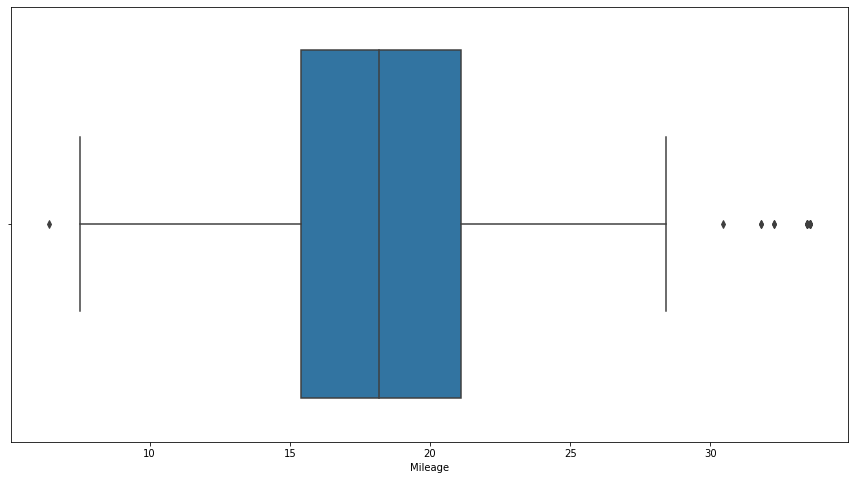

In [28]:
plt.figure(figsize = (15,8))
sns.boxplot(data['Mileage'])

In [29]:
ul = data['Mileage'].mean() + 3*data['Mileage'].std()
ll = data['Mileage'].mean() - 3*data['Mileage'].std()
print("upper limit", ul)
print("lower limit", ll)

upper limit 30.834776365696325
lower limit 5.864631165684489


C:\Users\Dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Power'>

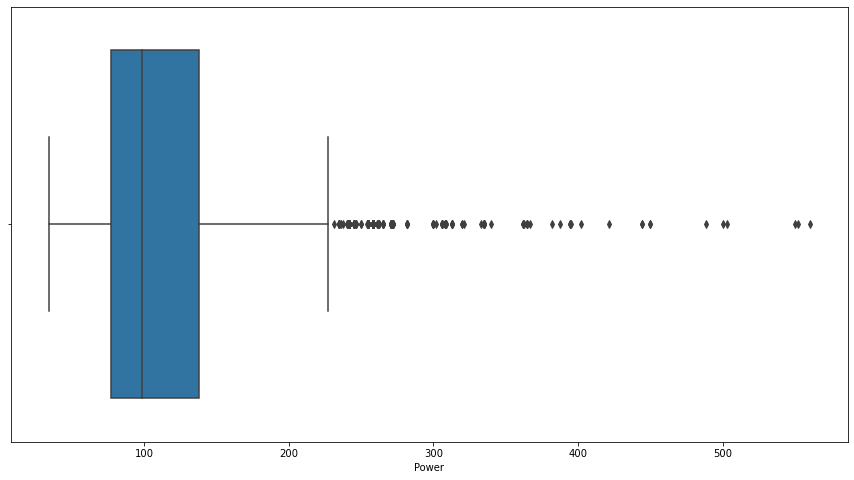

In [30]:
plt.figure(figsize = (15,8))
sns.boxplot(data['Power'])

In [31]:
ul = data['Power'].mean() + 3*data['Power'].std()
ll = data['Power'].mean() - 3*data['Power'].std()
print("upper limit", ul)
print("lower limit", ll)

upper limit 273.4716342207246
lower limit -47.03082417888524


In [32]:
ul = data['Engine'].mean() + 3*data['Engine'].std()
ll = data['Engine'].mean() - 3*data['Engine'].std()
print("upper limit", ul)
print("lower limit", ll)

upper limit 3424.7176569114026
lower limit -181.50426779006375


C:\Users\Dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine'>

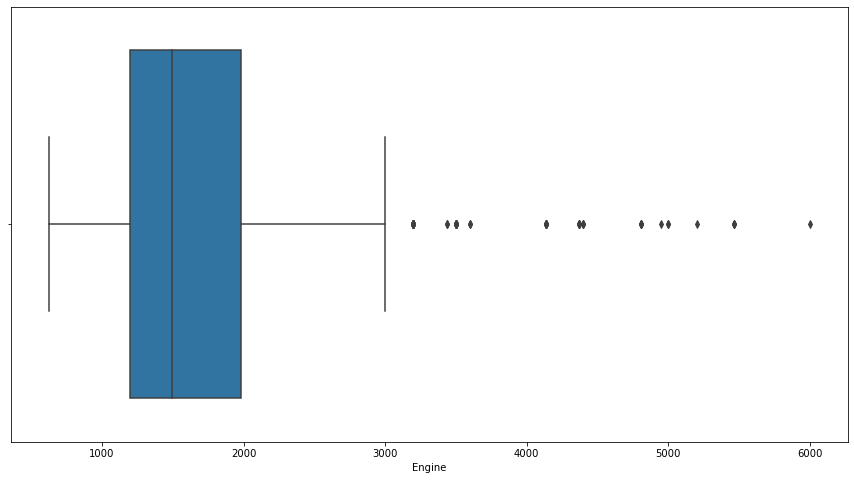

In [33]:
plt.figure(figsize = (15,8))
sns.boxplot(data['Engine'])

C:\Users\Dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kilometers_Driven'>

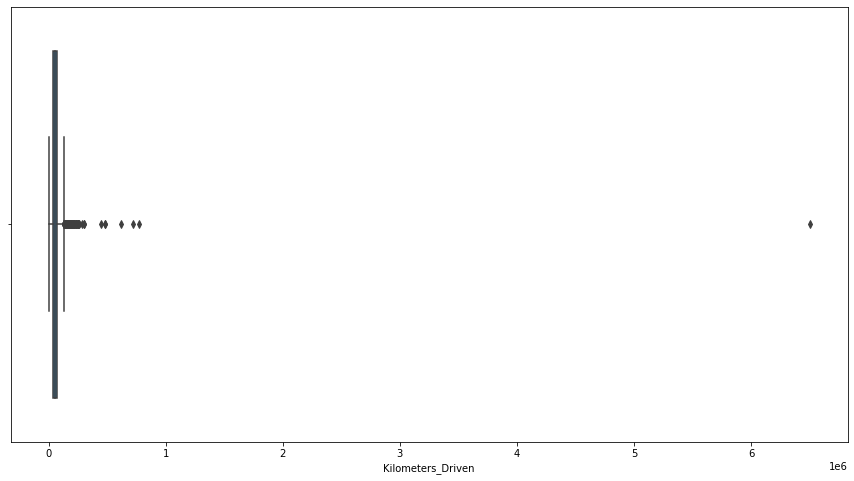

In [34]:
plt.figure(figsize = (15,8))
sns.boxplot(data['Kilometers_Driven'])

In [35]:
data.drop(data[data['Engine'] > 5000].index, axis = 0, inplace = True)
data.drop(data[data['Kilometers_Driven'] > 100000].index, axis = 0, inplace = True)

## 2. EDA: Univariate Analysis of features

0.20236657861948315

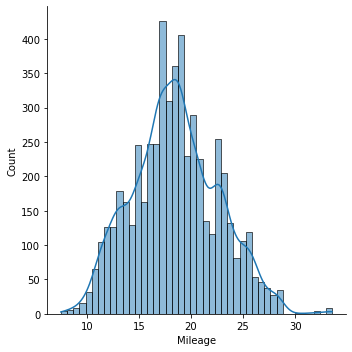

In [36]:
sns.displot(data['Mileage'], kde=True)
data['Mileage'].skew()

0.05468388727183885

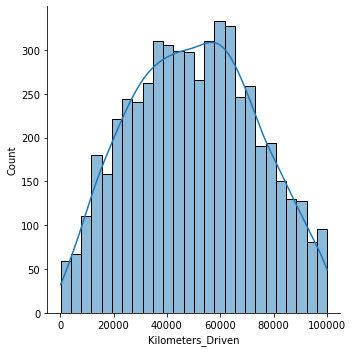

In [37]:
sns.displot(data['Kilometers_Driven'], kde=True)
data['Kilometers_Driven'].skew()

1.8100285455553111

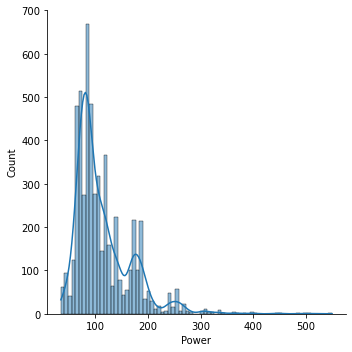

In [38]:
sns.displot(data['Power'], kde=True)
data['Power'].skew()

1.3873947850013293

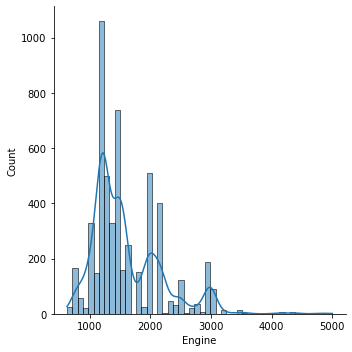

In [39]:
sns.displot(data['Engine'], kde=True)
data['Engine'].skew()

3.16733941301693

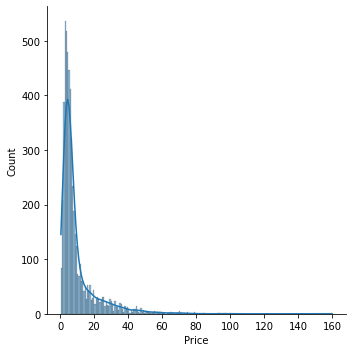

In [40]:
sns.displot(data['Price'], kde=True)
data["Price"].skew()

## Feature Scaling using Log Normalization 

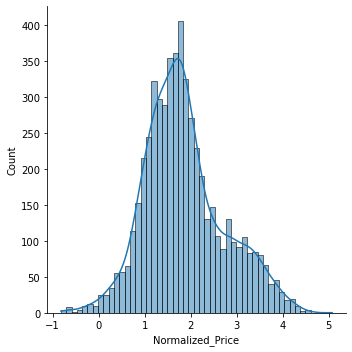

In [41]:
data['Normalized_Price'] = np.log(data['Price'])
sns.displot(data['Normalized_Price'], kde=True)

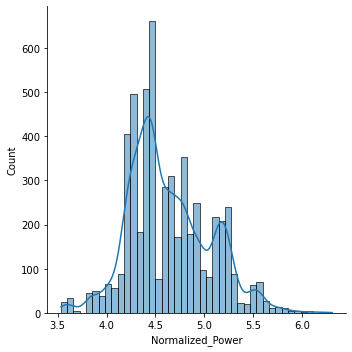

In [42]:
data['Normalized_Power'] = np.log(data['Power'])
sns.displot(data['Normalized_Power'], kde=True)

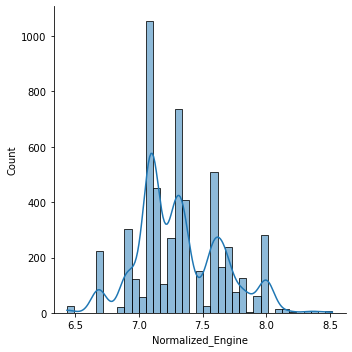

In [44]:
data['Normalized_Engine'] = np.log(data['Engine'])
sns.displot(data['Normalized_Engine'], kde=True)

## Establishing Relationship between Price and Mileage of cars by Brand

Text(0.5, 1.0, 'Maruti')

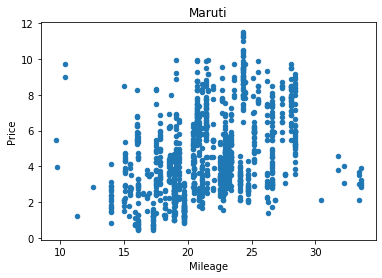

In [125]:
dm = data[data['Brand']=='Maruti']
dm.plot.scatter(x = 'Mileage', y= 'Price',)

plt.title("Maruti")

#### There is a visible growth of price with increasing Mileage in Maruti's case

Text(0.5, 1.0, 'Hyundai')

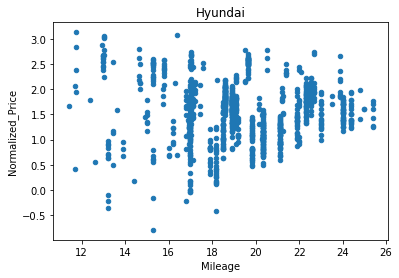

In [83]:
d_hyu = data[data['Brand']=='Hyundai']
d_hyu.plot.scatter(x = 'Mileage', y= 'Price',)
plt.title("Hyundai")

Text(0.5, 1.0, 'Honda')

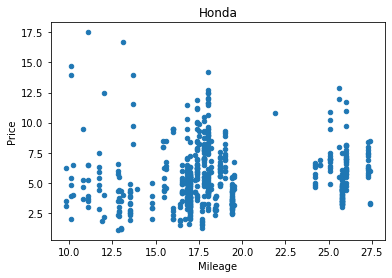

In [47]:
d_hon= data[data['Brand']=='Honda']
d_hon.plot.scatter(x = 'Mileage', y= 'Price',)
plt.title('Honda')

Text(0.5, 1.0, 'Toyota')

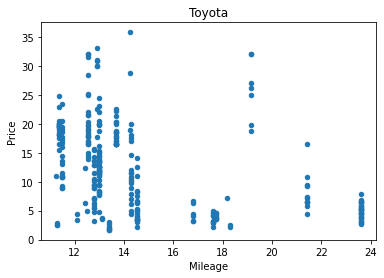

In [48]:
d_toy = data[data['Brand']=='Toyota']
d_toy.plot.scatter(x = 'Mileage', y= 'Price')
plt.title('Toyota')

Text(0.5, 1.0, 'Mercedes')

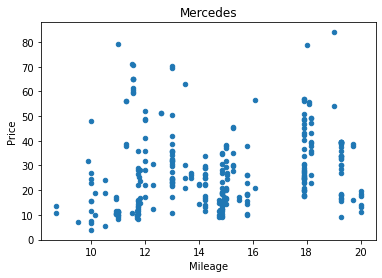

In [49]:
d_mb = data[data['Brand']=='Mercedes-Benz']
d_mb.plot.scatter(x = 'Mileage', y= 'Price',)
plt.title("Mercedes")

Text(0.5, 1.0, 'VW')

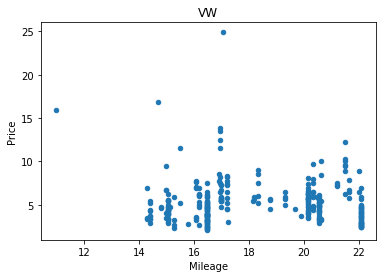

In [50]:
d_vw = data[data['Brand']=='Volkswagen']
d_vw.plot.scatter(x = 'Mileage', y= 'Price',)
plt.title("VW")

Text(0.5, 1.0, 'Ford')

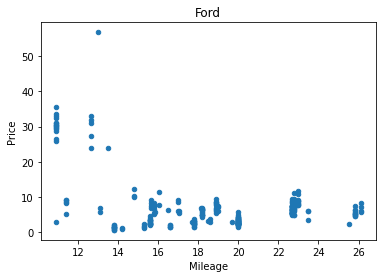

In [51]:
d_f = data[data['Brand']=='Ford']
d_f.plot.scatter(x = 'Mileage', y= 'Price',)
plt.title("Ford")

Text(0.5, 1.0, 'Mahindra')

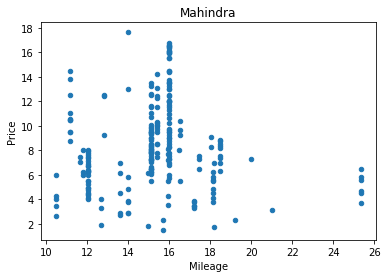

In [52]:
d_mah = data[data['Brand']=='Mahindra']
d_mah.plot.scatter(x = 'Mileage', y= 'Price',)
plt.title("Mahindra")

Text(0.5, 1.0, 'BMW')

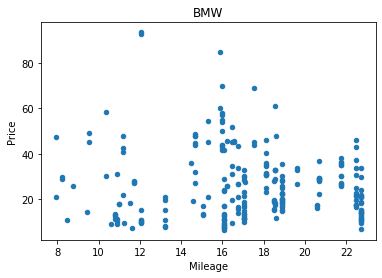

In [53]:
d_bmw = data[data['Brand']=='BMW']
d_bmw.plot.scatter(x = 'Mileage', y= 'Price',)
plt.title("BMW")

Text(0.5, 1.0, 'Audi')

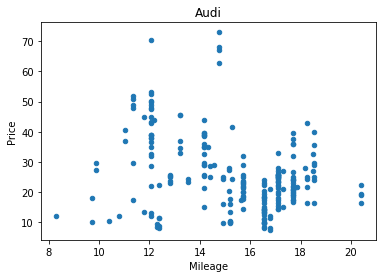

In [54]:
d_audi = data[data['Brand']=='Audi']
d_audi.plot.scatter(x = 'Mileage', y= 'Price',)
plt.title("Audi")

Text(0.5, 1.0, 'Tata')

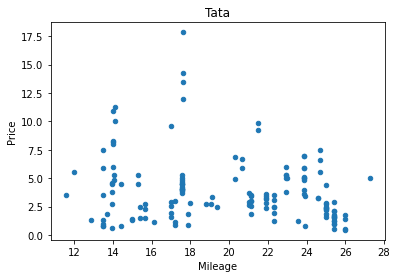

In [55]:
d_tata = data[data['Brand']=='Tata']
d_tata.plot.scatter(x = 'Mileage', y= 'Price',)
plt.title("Tata")

Text(0.5, 1.0, 'Skoda')

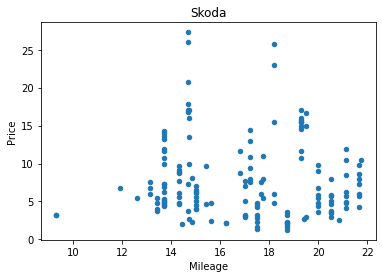

In [56]:
d_sk = data[data['Brand']=='Skoda']
d_sk.plot.scatter(x = 'Mileage', y= 'Price',)
plt.title("Skoda")

Text(0.5, 1.0, 'Renault')

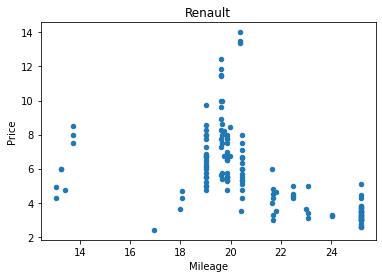

In [57]:
d_re = data[data['Brand']=='Renault']
d_re.plot.scatter(x = 'Mileage', y= 'Price',)
plt.title("Renault")

Text(0.5, 1.0, 'Chevrolet')

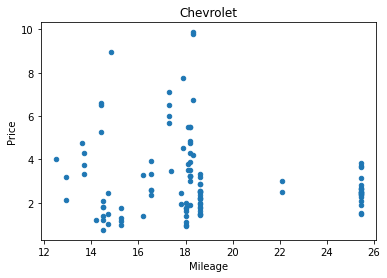

In [58]:
d_ch = data[data['Brand']=='Chevrolet']
d_ch.plot.scatter(x = 'Mileage', y= 'Price',)
plt.title("Chevrolet")

Text(0.5, 1.0, 'Nissan')

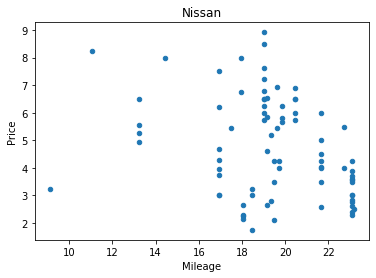

In [59]:
dn = data[data['Brand']=='Nissan']
dn.plot.scatter(x = 'Mileage', y= 'Price',)
plt.title("Nissan")

Text(0.5, 1.0, 'Land Rover')

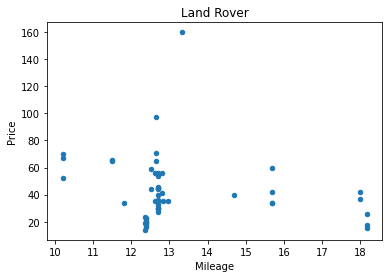

In [60]:
d_lr = data[data['Brand']=='Land']
d_lr.plot.scatter(x = 'Mileage', y= 'Price',)
plt.title("Land Rover")

<AxesSubplot:>

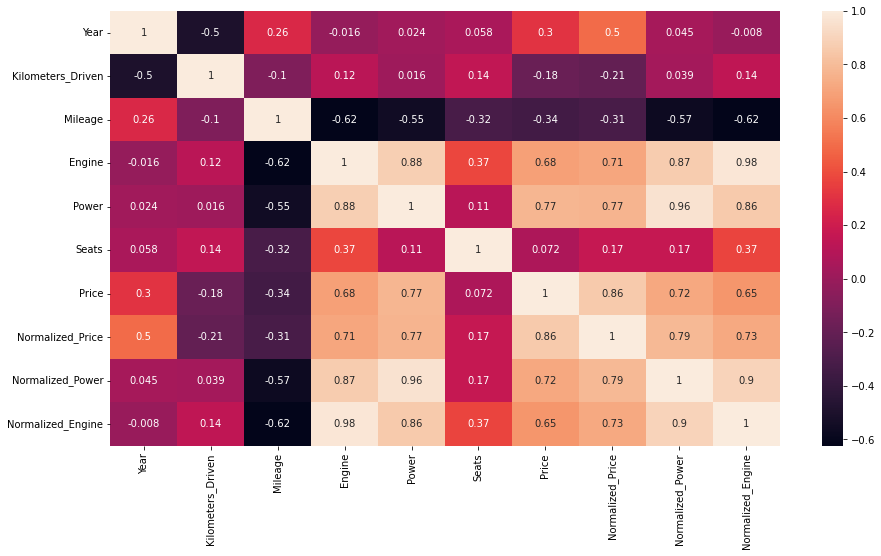

In [61]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot=True)

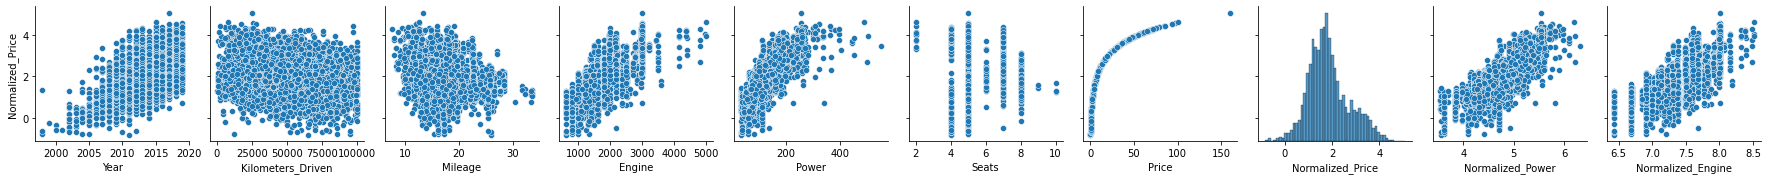

In [62]:
sns.pairplot(data, y_vars='Normalized_Price')

## Bi-variate Analysis

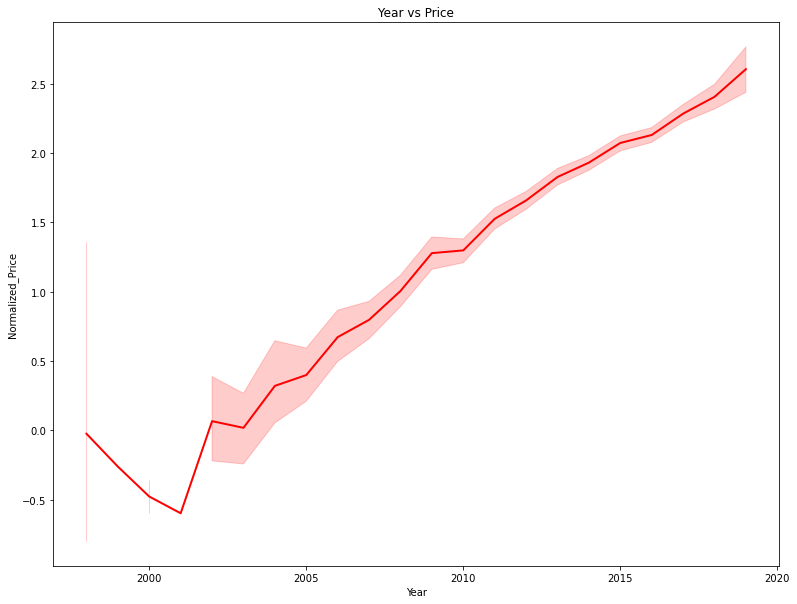

In [63]:
plt.figure(figsize = (13,10))
sns.lineplot(data = data, x = 'Year', y = 'Normalized_Price', linewidth = 2, color='r')
plt.title(" Year vs Price ")
plt.show()

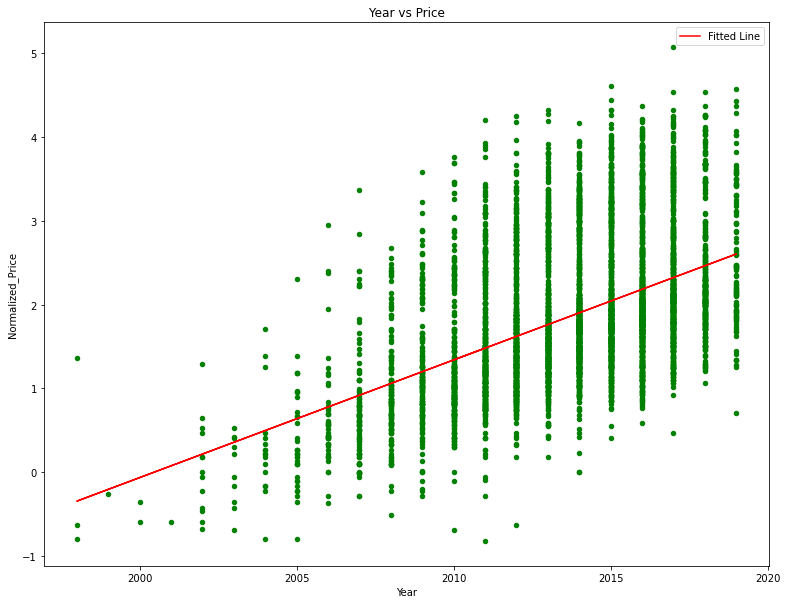

In [184]:
data.plot.scatter(x= 'Year', y= 'Normalized_Price', figsize= (13,10), color='green')
m, b = np.polyfit(data['Year'], data['Normalized_Price'], 1)
plt.plot(data['Year'], m * data['Year'] + b, label='Fitted Line', color='red')
plt.legend()
plt.title(" Year vs Price ")
plt.show()

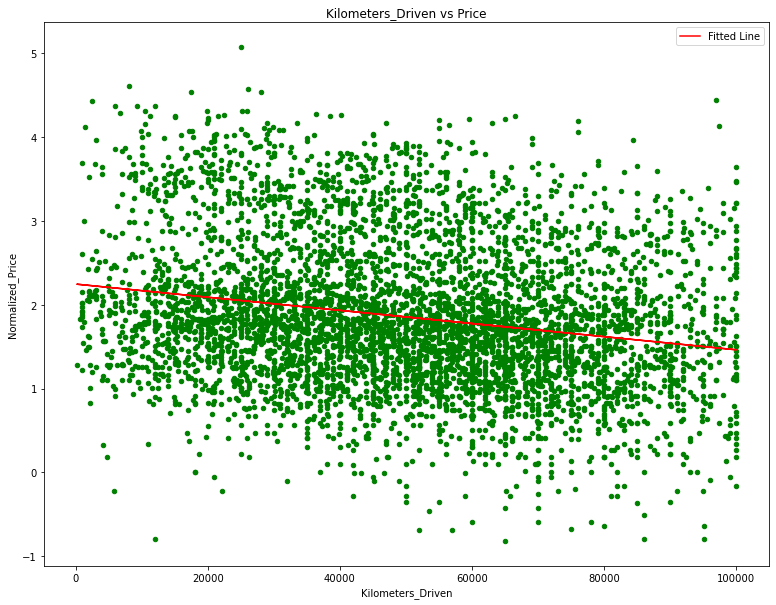

In [65]:
data.plot.scatter(x= 'Kilometers_Driven', y= 'Normalized_Price', figsize= (13,10), color='green')
m, b = np.polyfit(data['Kilometers_Driven'], data['Normalized_Price'], 1)
plt.plot(data['Kilometers_Driven'], m * data['Kilometers_Driven'] + b, label='Fitted Line', color='red')
plt.title('Kilometers_Driven vs Price')
plt.legend()
plt.show()

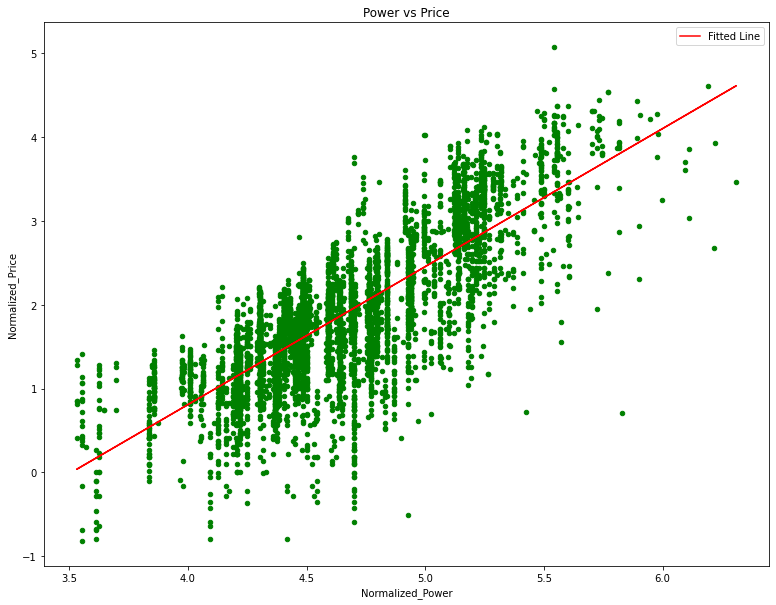

In [66]:
data.plot.scatter(x= 'Normalized_Power', y= 'Normalized_Price', figsize= (13,10), color='green')
m, b = np.polyfit(data['Normalized_Power'], data['Normalized_Price'], 1)
plt.plot(data['Normalized_Power'], m * data['Normalized_Power'] + b, label='Fitted Line', color='red')
plt.title("Power vs Price")
plt.legend()
plt.show()

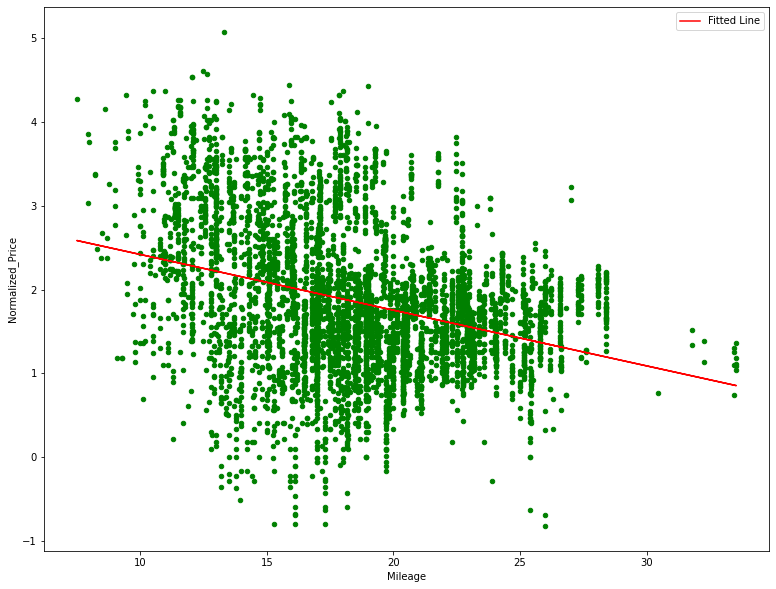

In [67]:
data.plot.scatter(x= 'Mileage', y= 'Normalized_Price', figsize= (13,10), color='green')
m, b = np.polyfit(data['Mileage'], data['Normalized_Price'], 1)
plt.plot(data['Mileage'], m * data['Mileage'] + b, label='Fitted Line', color='red')
plt.legend()
plt.show()

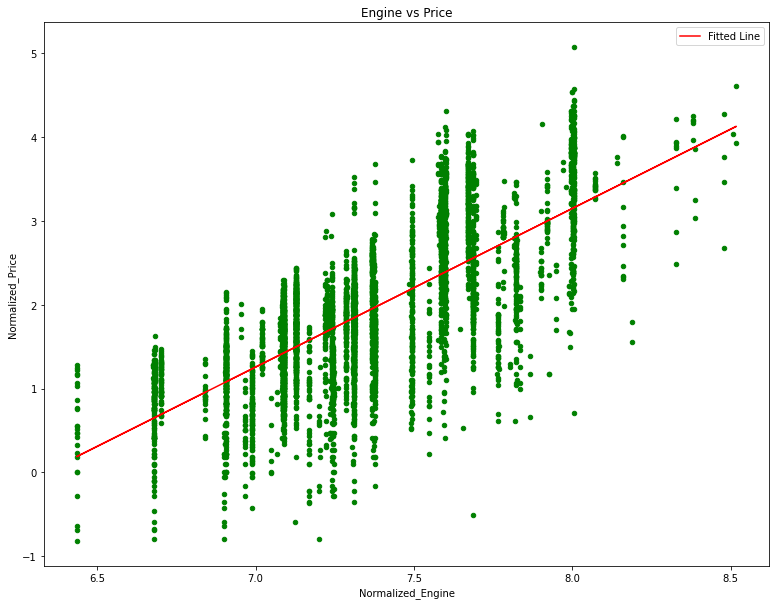

In [68]:
data.plot.scatter(x= 'Normalized_Engine', y= 'Normalized_Price', figsize= (13,10), color='green')
m, b = np.polyfit(data['Normalized_Engine'], data['Normalized_Price'], 1)
plt.plot(data['Normalized_Engine'], m * data['Normalized_Engine'] + b, label='Fitted Line', color='red')
plt.title("Engine vs Price")
plt.legend()
plt.show()

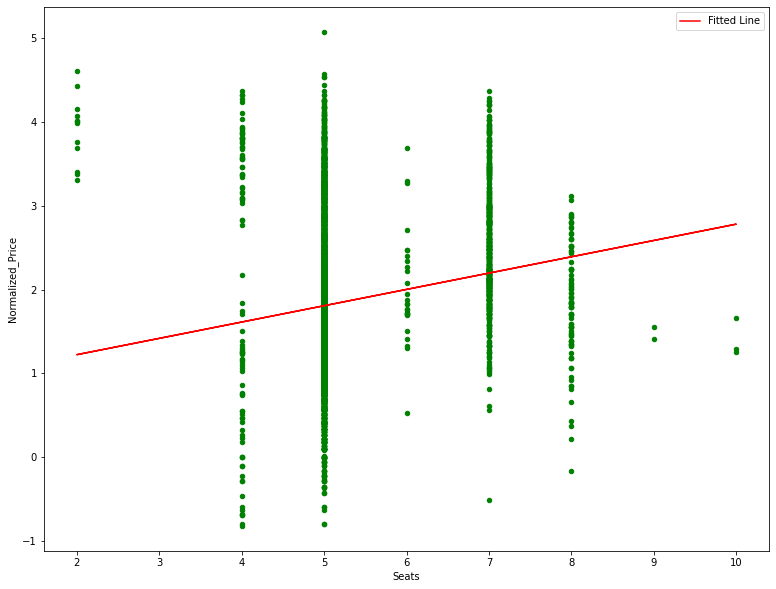

In [69]:
data.plot.scatter(x= 'Seats', y= 'Normalized_Price', figsize= (13,10), color='green')
m, b = np.polyfit(data['Seats'], data['Normalized_Price'], 1)
plt.plot(data['Seats'], m * data['Seats'] + b, label='Fitted Line', color='red')
plt.legend()
plt.show()

## Multiple Linear Regression

In [70]:
x = data[[  'Year', 'Normalized_Power', 'Normalized_Engine']]
y = data[['Normalized_Price']]

### Spliting the data into training and test set

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [73]:
print("Coefficients : ", model.coef_)
print("Intercept : ", model.intercept_)

Coefficients :  [[0.13198276 1.21794927 0.54496938]]
Intercept :  [-273.54343157]


In [74]:
pred = model.predict(x_test)

In [75]:
results = pd.DataFrame({'Real': y_test.values.reshape(-1), 'Predicted': pred.reshape(-1)})
results

,Real,Predicted
0,1.249902,1.569260
1,1.648659,1.551049
2,2.014903,2.272744
3,1.791759,2.988794
4,3.244154,2.509159
...,...,...
1089,1.423108,1.265247
1090,1.704748,2.019575
1091,1.335001,1.489365
1092,1.504077,1.809775


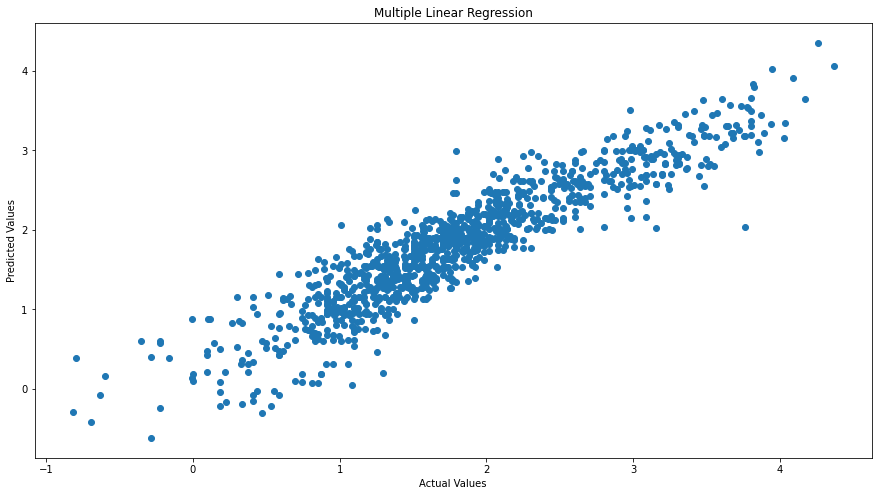

In [76]:
plt.figure(figsize= (15,8))
plt.scatter(y_test, pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Multiple Linear Regression')
plt.show()

### Performance Evaluation of Model

In [77]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [85]:
mae = mean_absolute_error(y_test, pred)
print("MAE : ", mae)


r2_sc = r2_score(y_test, pred)
print("R2 Score : ", r2_sc*100,'%')


mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

MAE :  0.26100897657678257
R2 Score :  84.31461511565121 %
Root Mean Squared Error: 0.33535256399665514


#### The accuracy of the model is 84.4% . 